In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family="NanumGothic")
plt.rc("axes", unicode_minus=False)

In [2]:
df = pd.read_csv("data/상가업소정보_201912_01.csv", sep="|")
df.shape

(573680, 39)

In [3]:
df.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

<AxesSubplot:>

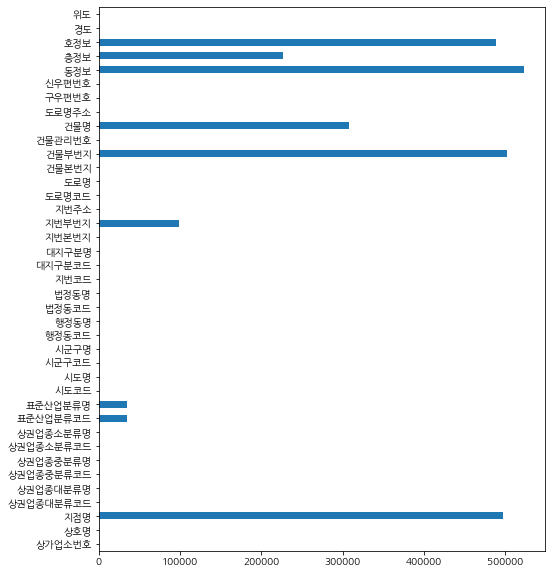

In [5]:
df.isnull().sum().plot.barh(figsize=(8, 10))

In [6]:
columns = ["상호명", '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명', '법정동명','도로명주소', '경도', '위도']
df = df[columns]
df.shape

(573680, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


In [8]:
df_seoul = df[df['시도명'] == '서울특별시']
df_seoul.shape

(407376, 11)

In [9]:
df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower()

C:\Users\user\AppData\Local\Temp\ipykernel_32944\3663213320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower()


In [10]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("이디야|이디아|ediya")].shape

(543, 12)

In [11]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("스타벅스|starbucks|")].shape

(407376, 12)

In [12]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("이디야|이디아|ediya"), '브랜드명'] = '이디야'
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("스타벅스|starbucks"), '브랜드명'] = '스타벅스'

df_cafe = df_seoul[(df_seoul['브랜드명'] == '이디야') | (df_seoul['브랜드명'] == '스타벅스')]
df_cafe[['상호명_소문자', '브랜드명']].head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_32944\4193159145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.loc[df_seoul["상호명_소문자"].str.contains("이디야|이디아|ediya"), '브랜드명'] = '이디야'


,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,이디야
8534,이디야커피,이디야
13913,이디아,이디야
14605,이디야커피,이디야
14770,스타벅스커피여의도ifc1f,스타벅스
14781,스타벅스,스타벅스


<AxesSubplot:>

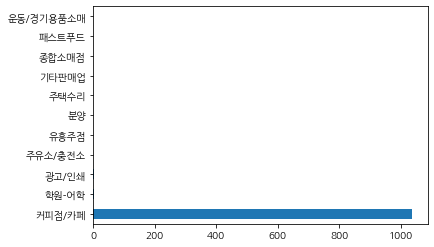

In [13]:
df_cafe['상권업종중분류명'].value_counts().plot.barh()

In [14]:
df_cafe = df_cafe[df_cafe['상권업종중분류명'] == '커피점/카페']
df_cafe.shape

(1036, 13)

In [15]:
df_cafe["브랜드명"].value_counts()

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

<AxesSubplot:xlabel='시군구명', ylabel='count'>

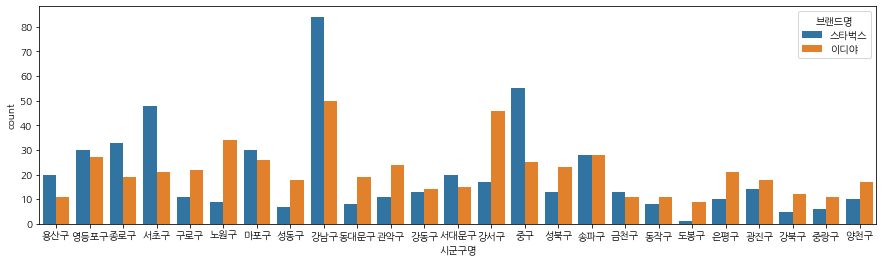

In [16]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_cafe, x='시군구명', hue='브랜드명')

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

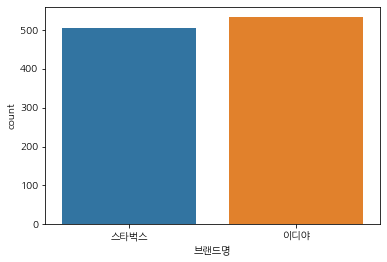

In [17]:
sns.countplot(data=df_cafe, x='브랜드명')

<AxesSubplot:xlabel='경도', ylabel='위도'>

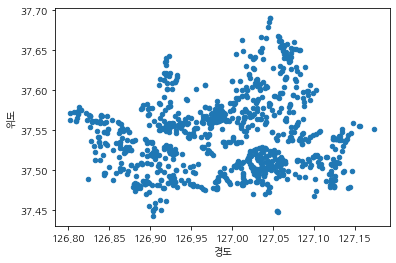

In [18]:
df_cafe[['위도', '경도']].plot.scatter(x='경도', y='위도')

<AxesSubplot:xlabel='경도', ylabel='위도'>

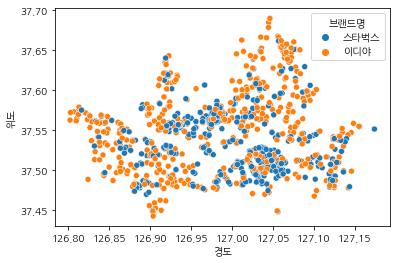

In [19]:
sns.scatterplot(data=df_cafe, x='경도', y='위도', hue='브랜드명')

In [20]:
df_cafe_vs = df_cafe.groupby(['시군구명', '브랜드명'])['상호명'].count()
df_cafe_vs

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
      이디야     12
강서구   스타벅스    17
      이디야     46
관악구   스타벅스    11
      이디야     24
광진구   스타벅스    14
      이디야     18
구로구   스타벅스    11
      이디야     22
금천구   스타벅스    13
      이디야     11
노원구   스타벅스     9
      이디야     34
도봉구   스타벅스     1
      이디야      9
동대문구  스타벅스     8
      이디야     19
동작구   스타벅스     8
      이디야     11
마포구   스타벅스    30
      이디야     26
서대문구  스타벅스    20
      이디야     15
서초구   스타벅스    48
      이디야     21
성동구   스타벅스     7
      이디야     18
성북구   스타벅스    13
      이디야     23
송파구   스타벅스    28
      이디야     28
양천구   스타벅스    10
      이디야     17
영등포구  스타벅스    30
      이디야     27
용산구   스타벅스    20
      이디야     11
은평구   스타벅스    10
      이디야     21
종로구   스타벅스    33
      이디야     19
중구    스타벅스    55
      이디야     25
중랑구   스타벅스     6
      이디야     11
Name: 상호명, dtype: int64

In [21]:
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5
5,강북구,이디야,12
6,강서구,스타벅스,17
7,강서구,이디야,46
8,관악구,스타벅스,11
9,관악구,이디야,24


In [22]:
df_cafe_vs.columns = ['구', '브랜드명', '매장수']
df_cafe_vs.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [23]:
pivot = pd.pivot_table(data=df_cafe, index=['시군구명', '브랜드명'], values='상호명', aggfunc='count')
pivot

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5
     이디야    12
강서구  스타벅스   17
     이디야    46
관악구  스타벅스   11
     이디야    24
광진구  스타벅스   14
     이디야    18
구로구  스타벅스   11
     이디야    22
금천구  스타벅스   13
     이디야    11
노원구  스타벅스    9
     이디야    34
도봉구  스타벅스    1
     이디야     9
동대문구 스타벅스    8
     이디야    19
동작구  스타벅스    8
     이디야    11
마포구  스타벅스   30
     이디야    26
서대문구 스타벅스   20
     이디야    15
서초구  스타벅스   48
     이디야    21
성동구  스타벅스    7
     이디야    18
성북구  스타벅스   13
     이디야    23
송파구  스타벅스   28
     이디야    28
양천구  스타벅스   10
     이디야    17
영등포구 스타벅스   30
     이디야    27
용산구  스타벅스   20
     이디야    11
은평구  스타벅스   10
     이디야    21
종로구  스타벅스   33
     이디야    19
중구   스타벅스   55
     이디야    25
중랑구  스타벅스    6
     이디야    11

In [24]:
pivot.loc['중랑구']

,상호명
브랜드명,
스타벅스,6
이디야,11


<AxesSubplot:xlabel='구', ylabel='매장수'>

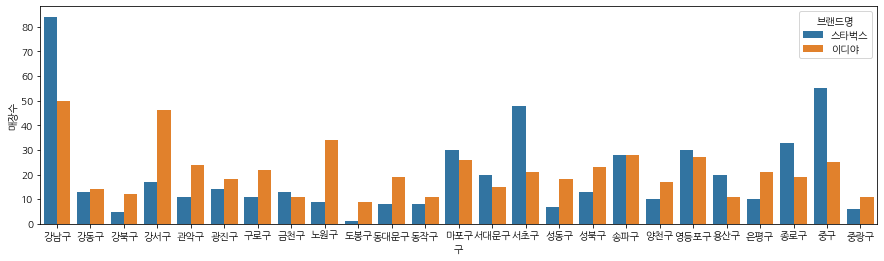

In [25]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs, x='구', y='매장수', hue="브랜드명")

<AxesSubplot:xlabel='구', ylabel='매장수'>

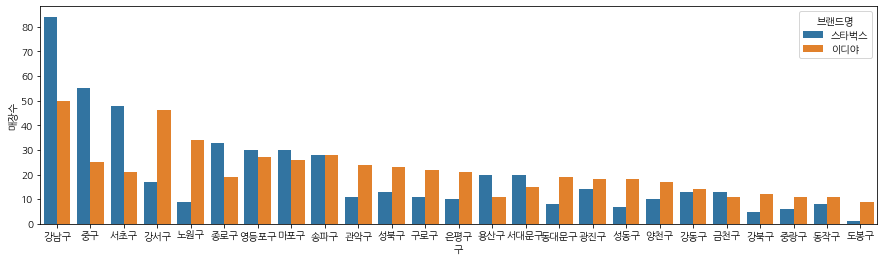

In [26]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs.sort_values('매장수', ascending=False), x='구', y='매장수', hue="브랜드명")

In [27]:
!pip install folium

You should consider upgrading via the 'C:\Users\user\PycharmProjects\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [28]:
import folium
new_map = folium.Map(location=[37.5429, 126.9887], zoom_start=17)
new_map

In [29]:
lat = df_cafe['위도'].mean()
long = df_cafe['경도'].mean()
lat, long

(37.542921398212634, 126.9887885123524)

In [30]:
m = folium.Map(location=[lat, long], zoom_start=12, tiles='Stamen Toner')

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, '위도']
    sub_long = df_cafe.loc[i, '경도']
    
    title = f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명주소']}"
    if df_cafe.loc[i, '브랜드명'] == '스타벅스':
        color = 'green'
    else:
        color = 'blue'
    folium.CircleMarker([sub_lat, sub_long], radius=3, color=color, tooltip=title).add_to(m)
m

In [31]:
geo_path = 'data/seoul_municipalities_geo_simple.json'

import json
geo_json = json.load(open(geo_path, encoding='utf-8'))

In [32]:
df_star = df_cafe_vs[df_cafe_vs['브랜드명'] == '스타벅스']
df_star

,구,브랜드명,매장수
0,강남구,스타벅스,84
2,강동구,스타벅스,13
4,강북구,스타벅스,5
6,강서구,스타벅스,17
8,관악구,스타벅스,11
10,광진구,스타벅스,14
12,구로구,스타벅스,11
14,금천구,스타벅스,13
16,노원구,스타벅스,9
18,도봉구,스타벅스,1


In [33]:
m = folium.Map([lat, long], zoom_start=12)

folium.Choropleth(
    geo_data = geo_json,
    data = df_star,
    columns=['구', '매장수'],
    key_on="feature.properties.name",
    fill_color = "YlGn",
    fill_opacity = 0.7
).add_to(m)

m

In [34]:
df_ediya = df_cafe_vs[df_cafe_vs['브랜드명'] == '이디야']
df_ediya

,구,브랜드명,매장수
1,강남구,이디야,50
3,강동구,이디야,14
5,강북구,이디야,12
7,강서구,이디야,46
9,관악구,이디야,24
11,광진구,이디야,18
13,구로구,이디야,22
15,금천구,이디야,11
17,노원구,이디야,34
19,도봉구,이디야,9


In [35]:
m = folium.Map([lat, long], zoom_start=12)

folium.Choropleth(
    geo_data = geo_json,
    data = df_ediya,
    columns=['구', '매장수'],
    key_on="feature.properties.name",
    fill_color = "Blues",
    fill_opacity = 0.7
).add_to(m)

m

In [38]:
df_vs = df_cafe_vs.pivot(index='구', columns='브랜드명', values='매장수')
df_vs

브랜드명,스타벅스,이디야
구,,
강남구,84,50
강동구,13,14
강북구,5,12
강서구,17,46
관악구,11,24
광진구,14,18
구로구,11,22
금천구,13,11
노원구,9,34


In [41]:
df_vs['매장수비교'] = (df_vs['스타벅스'] > df_vs['이디야'])
df_vs

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,True
강동구,13,14,False
강북구,5,12,False
강서구,17,46,False
관악구,11,24,False
광진구,14,18,False
구로구,11,22,False
금천구,13,11,True
노원구,9,34,False


In [43]:
df_vs['매장수비교'] = df_vs['매장수비교'].astype(float)
df_vs

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,1.0
강동구,13,14,0.0
강북구,5,12,0.0
강서구,17,46,0.0
관악구,11,24,0.0
광진구,14,18,0.0
구로구,11,22,0.0
금천구,13,11,1.0
노원구,9,34,0.0


In [44]:
df_vs = df_vs.reset_index()
df_vs

브랜드명,구,스타벅스,이디야,매장수비교
0,강남구,84,50,1.0
1,강동구,13,14,0.0
2,강북구,5,12,0.0
3,강서구,17,46,0.0
4,관악구,11,24,0.0
5,광진구,14,18,0.0
6,구로구,11,22,0.0
7,금천구,13,11,1.0
8,노원구,9,34,0.0
9,도봉구,1,9,0.0


In [45]:
m = folium.Map([lat, long], zoom_start=12)

folium.Choropleth(
    geo_data = geo_json,
    data = df_vs,
    columns=['구', '매장수비교'],
    key_on="feature.properties.name",
    fill_color = "BuGn",
    fill_opacity = 0.7
).add_to(m)

m